<a href="https://colab.research.google.com/github/Yefri-Realpe/Repositorio-de-Bootcamp-de-Inteligencia-Artificial-B-sico/blob/main/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción del Rendimiento Diario de Conductores en Plataformas de Transporte**

Objetivo General: Utilizar un dataset de tamaño mediano proveniente de Kaggle, que contenga información de viajes similares a los realizados en plataformas como Uber o InDriver, para entrenar un modelo de machine learning capaz de predecir el rendimiento diario de un conductor, ya sea en términos de ingresos o cantidad de viajes, con base en variables como el día de la semana, la hora, la zona y la duración de los trayectos.

1. Regresión lineal múltiple con ingreso diario como variable dependiente:

2. Clasificación de los datos por zonas:

3. Segmentación de los datos:

Conjunto de Datos Utilizado
El conjunto de datos utilizado en este proyecto fue descargado desde la plataforma Kaggle. Según la descripción proporcionada en la fuente, los datos fueron recopilados en México y están relacionados con la actividad de conductores en plataformas de transporte como Uber e InDriver.

Para efectos del análisis, el dataset fue modificado previamente con el fin de conservar únicamente las variables más relevantes para el modelo de predicción. Las características principales que contiene son:

- Zona
- Duración promedio de los viajes (en minutos)
- Cantidad de viajes
- Ingresos diarios

Adicionalmente, se realizó una conversión de variables categóricas a valores numéricos para facilitar los cálculos y el procesamiento de los datos por parte de los modelos de machine learning.

Se crearon dos versiones del archivo:

- Una versión completa, que incluye todas las variables, incluida la zona donde se tomo el viaje.

- Otra versión simplificada, en la que se eliminó la variable “zona”.

# **1. Regresión lineal múltiple con ingreso diario como variable dependiente**
para el desarrollo del modelo de regresión lineal múltiple, se utilizará la versión del archivo que no contiene la variable "zona". Esta elección se hace con el propósito de evaluar la capacidad predictiva del modelo utilizando únicamente las siguientes variables de x1 = Duración promedio de los viajes (en minutos), x2 = Cantidad de viajes.

y = Ingresos diarios

In [ ]:
import pandas as pd
import sklearn
import seaborn as sns
rendimiento = pd.read_csv("Regresion_rendimiento_conductores.csv")
rendimiento

,duracion_promedio_viajes_min,cantidad_viajes,ingresos_diarios
0,43.07,4,158.01
1,24.38,24,581.18
2,12.81,4,45.28
3,20.36,9,247.81
4,27.46,11,243.54
...,...,...,...
1195,40.10,10,508.91
1196,21.90,23,418.16
1197,5.51,16,110.32
1198,9.26,13,120.33


In [ ]:
# 1. Definir Y y X
Y = rendimiento['ingresos_diarios']
X = rendimiento.drop('ingresos_diarios', axis=1)

# 2. Renombrar las columnas de X a x1, x2, x3, ...
# Creamos un diccionario con los nuevos nombres
nuevos_nombres_columnas_X = {col: f'x{i+1}' for i, col in enumerate(X.columns)}

# Renombramos las columnas de X
X_renombrado = X.rename(columns=nuevos_nombres_columnas_X)

# 3. Renombrar la Serie Y a 'y' para la visualización
Y_renombrada = Y.rename('y')

# 4. Concatenar el DataFrame X renombrado y la Serie Y renombrada para visualización
# Esto incluirá las columnas renombradas de X (x1, x2, ...) y la columna Y renombrada ('y')
tabla_rendimiento = pd.concat([X_renombrado, Y_renombrada], axis=1)

# 5. Visualizar la tabla completa con columnas renombradas (x1, x2, ...) y la columna 'y'
display(tabla_rendimiento.head())

,x1,x2,y
0,43.07,4,158.01
1,24.38,24,581.18
2,12.81,4,45.28
3,20.36,9,247.81
4,27.46,11,243.54


In [ ]:
tabla_rendimiento["y"]=1
tabla_rendimiento.head()

,x1,x2,y
0,43.07,4,1
1,24.38,24,1
2,12.81,4,1
3,20.36,9,1
4,27.46,11,1


In [ ]:
matriz_x = pd.DataFrame(tabla_rendimiento)
matriz_x.head()

,x1,x2,y
0,43.07,4,1
1,24.38,24,1
2,12.81,4,1
3,20.36,9,1
4,27.46,11,1


In [ ]:
tr_transpuesto = tabla_rendimiento.T
tr_transpuesto

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
x1,43.07,24.38,12.81,20.36,27.46,31.12,21.37,24.67,33.41,22.75,...,42.71,33.4,31.97,40.75,26.36,40.1,21.9,5.51,9.26,20.23
x2,4.00,24.00,4.00,9.00,11.00,8.00,12.00,24.00,11.00,7.00,...,14.00,4.0,24.00,9.00,6.00,10.0,23.0,16.00,13.00,3.00
y,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.0,1.00,1.00,1.00,1.0,1.0,1.00,1.00,1.00


In [ ]:
matriz_x_ = pd.DataFrame(tr_transpuesto)
matriz_x_

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
x1,43.07,24.38,12.81,20.36,27.46,31.12,21.37,24.67,33.41,22.75,...,42.71,33.4,31.97,40.75,26.36,40.1,21.9,5.51,9.26,20.23
x2,4.00,24.00,4.00,9.00,11.00,8.00,12.00,24.00,11.00,7.00,...,14.00,4.0,24.00,9.00,6.00,10.0,23.0,16.00,13.00,3.00
y,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.0,1.00,1.00,1.00,1.0,1.0,1.00,1.00,1.00


In [ ]:
matriz_x_x = matriz_x_.dot(matriz_x)
matriz_x_x

,x1,x2,y
x1,926735.5566,434515.09,30360.14
x2,434515.0900,293426.00,17030.00
y,30360.1400,17030.00,1200.00


In [ ]:
import numpy as np
matriz_x_x_inv = np.linalg.inv(matriz_x_x)
print(matriz_x_x_inv)

[[ 6.31462970e-06 -4.45950013e-07 -1.53432094e-04]
 [-4.45950013e-07  1.93581841e-05 -2.63442308e-04]
 [-1.53432094e-04 -2.63442308e-04  8.45386864e-03]]


In [ ]:
import numpy as np
lista_y = np.array(Y_renombrada)
matriz_y = lista_y.reshape(-1, 1)
print(matriz_y)

[[158.01]
 [581.18]
 [ 45.28]
 ...
 [110.32]
 [120.33]
 [ 67.02]]


In [ ]:
beta= matriz_x_x_inv.dot(matriz_x_) .dot(matriz_y)
print(beta)

[[  16.45886633]
 [  28.8674391 ]
 [-410.6835034 ]]


In [ ]:
tabla_beta = pd.DataFrame(beta)
tabla_beta

,0
0,16.458866
1,28.867439
2,-410.683503


Conclusión:
- Si los viajes duran un minuto más en promedio, el conductor gana unos 16 pesos más.
- Si hace un viaje adicional, gana unos 29 pesos más.
Hay un número negativo en el modelo (el -410), que es lo que se llamaría el "punto de partida" cuando no hay viajes ni duración.

# **2. Clasificación de los Datos por Zonas**
Para este análisis se utilizará la versión del archivo que contiene todas las variables, incluyendo la variable categórica "Zona". ya que el objetivo será predecir a qué zona pertenece un conjunto de datos, basándose en:

x1: Duración promedio de los viajes (en minutos)

x2: Cantidad de viajes

x3: Ingresos diarios

La variable que se busca predecir será:

y: Zona

In [ ]:
import pandas as pd
import sklearn
import seaborn as sns
zona_c = pd.read_csv("Clasificacion_rendimiento_conductores.csv")
zona_c

,zona,duracion_promedio_viajes_min,cantidad_viajes,ingresos_diarios
0,2,43.07,4,158.01
1,1,24.38,24,581.18
2,0,12.81,4,45.28
3,5,20.36,9,247.81
4,1,27.46,11,243.54
...,...,...,...,...
1195,5,40.10,10,508.91
1196,1,21.90,23,418.16
1197,3,5.51,16,110.32
1198,0,9.26,13,120.33


In [ ]:
# 1. Definir Y y X
Y = zona_c['zona']
X = zona_c.drop('zona', axis=1)

# 2. Renombrar las columnas de X a x1, x2, x3, ...
# Creamos un diccionario con los nuevos nombres
nuevos_nombres_columnas_X = {col: f'x{i+1}' for i, col in enumerate(X.columns)}

# Renombramos las columnas de X
X_renombrado = X.rename(columns=nuevos_nombres_columnas_X)

# 3. Renombrar la Serie Y a 'y' para la visualización
Y_renombrada = Y.rename('y')

# 4. Concatenar el DataFrame X renombrado y la Serie Y renombrada para visualización
# Esto incluirá las columnas renombradas de X (x1, x2, ...) y la columna Y renombrada ('y')
tabla_zona = pd.concat([X_renombrado, Y_renombrada], axis=1)

# 5. Visualizar la tabla completa con columnas renombradas (x1, x2, ...) y la columna 'y'
display(tabla_zona.head())

,x1,x2,x3,y
0,43.07,4,158.01,2
1,24.38,24,581.18,1
2,12.81,4,45.28,0
3,20.36,9,247.81,5
4,27.46,11,243.54,1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
tabla_zona.describe()

,x1,x2,x3,y
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,25.300117,14.191667,415.404808,2.536667
std,11.501912,6.569188,299.037230,1.675608
min,5.070000,3.000000,19.490000,0.000000
25%,15.495000,9.000000,176.007500,1.000000
50%,25.665000,14.000000,338.025000,3.000000
75%,35.337500,20.000000,597.590000,4.000000
max,44.980000,25.000000,1598.440000,5.000000


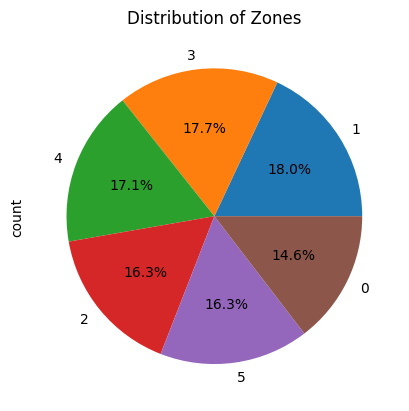

In [ ]:
svm_palette = ['#3d5a80', '#98c1d9', '#ee6c4d', '#293241']
plt.title("Distribution of Zones")
tabla_zona['y'].value_counts().plot.pie(autopct="%1.1f%%");

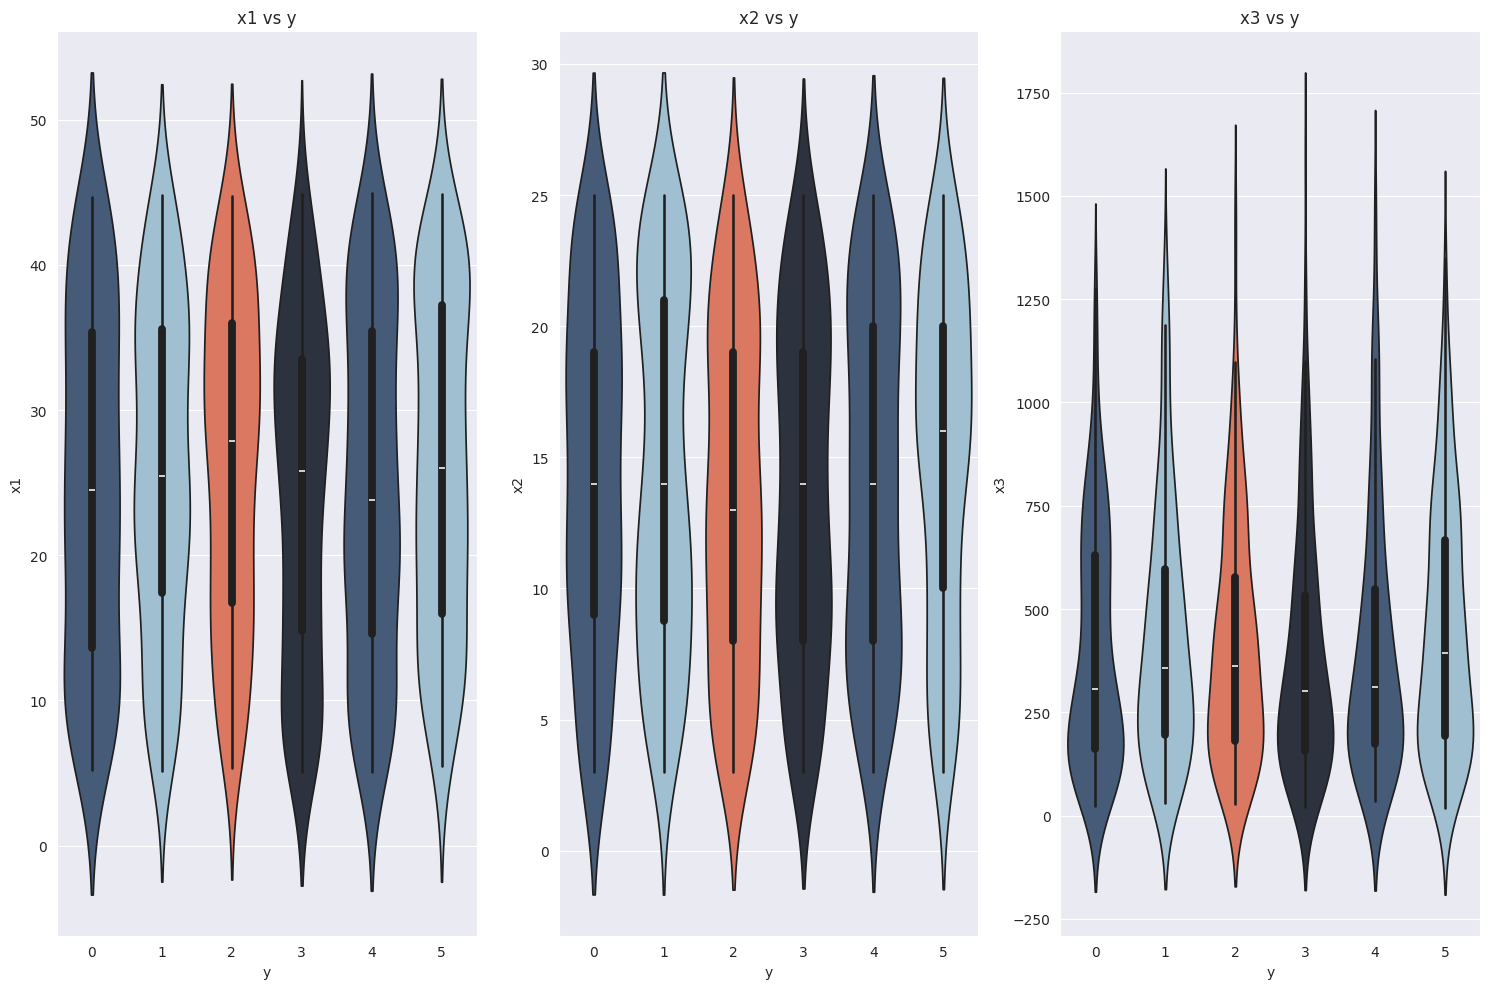

In [ ]:
# Analizando las medidas de las variables en diagramas de violín
plt.figure(figsize=(15, 10)) # Adjusted figure size for 3 plots
sns.set_style('darkgrid')

plt.subplot(1, 3, 1) # Adjusted subplot layout
sns.violinplot(x = 'y', y = 'x1', data = tabla_zona, palette=svm_palette)
plt.title('x1 vs y') # Added titles for clarity

plt.subplot(1, 3, 2) # Adjusted subplot layout
sns.violinplot(x = 'y', y = 'x2', data = tabla_zona, palette=svm_palette)
plt.title('x2 vs y') # Added titles for clarity

plt.subplot(1, 3, 3) # Adjusted subplot layout
sns.violinplot(x = 'y', y = 'x3', data = tabla_zona, palette=svm_palette)
plt.title('x3 vs y') # Added titles for clarity

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show() # Explicitly show the plot

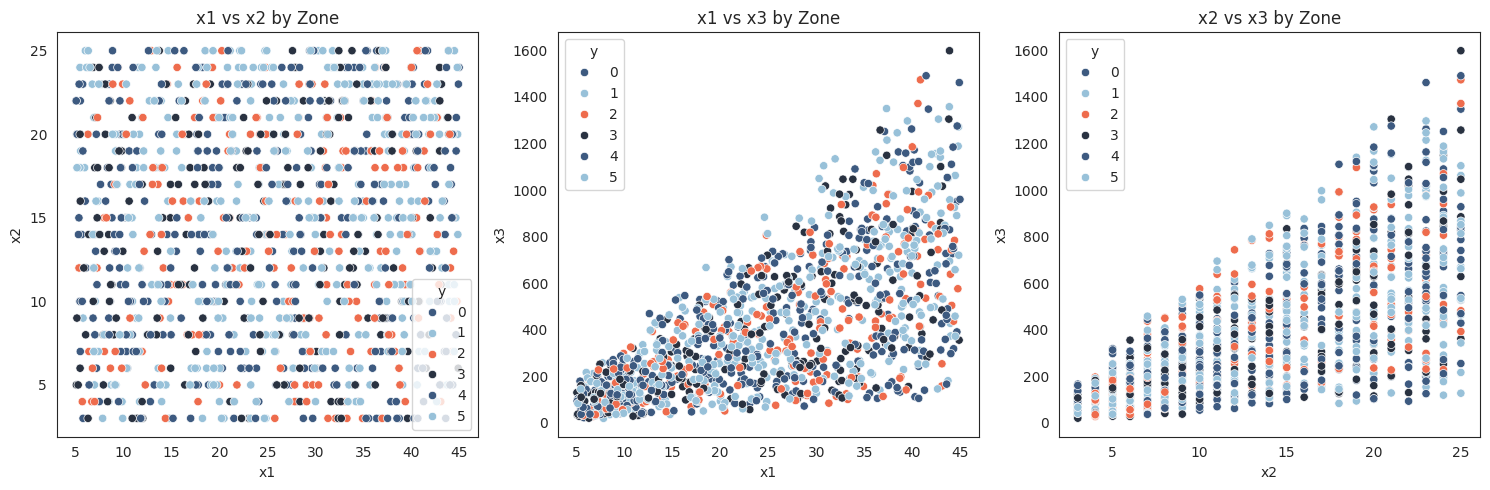

In [ ]:
# Visualizando las características en un análisis multivariado
plt.figure(figsize=(15, 5)) # Adjusted figure size for 3 plots
sns.set_style('white')

plt.subplot(1, 3, 1) # Adjusted subplot layout
sns.scatterplot(x = 'x1', y = 'x2', hue = 'y', data = tabla_zona, palette=svm_palette)
plt.title('x1 vs x2 by Zone') # Added titles for clarity

plt.subplot(1, 3, 2) # Adjusted subplot layout
sns.scatterplot(x = 'x1', y = 'x3', hue = 'y', data = tabla_zona, palette=svm_palette)
plt.title('x1 vs x3 by Zone') # Added titles for clarity

plt.subplot(1, 3, 3) # Adjusted subplot layout
sns.scatterplot(x = 'x2', y = 'x3', hue = 'y', data = tabla_zona, palette=svm_palette)
plt.title('x2 vs x3 by Zone') # Added titles for clarity

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show() # Explicitly show the plot

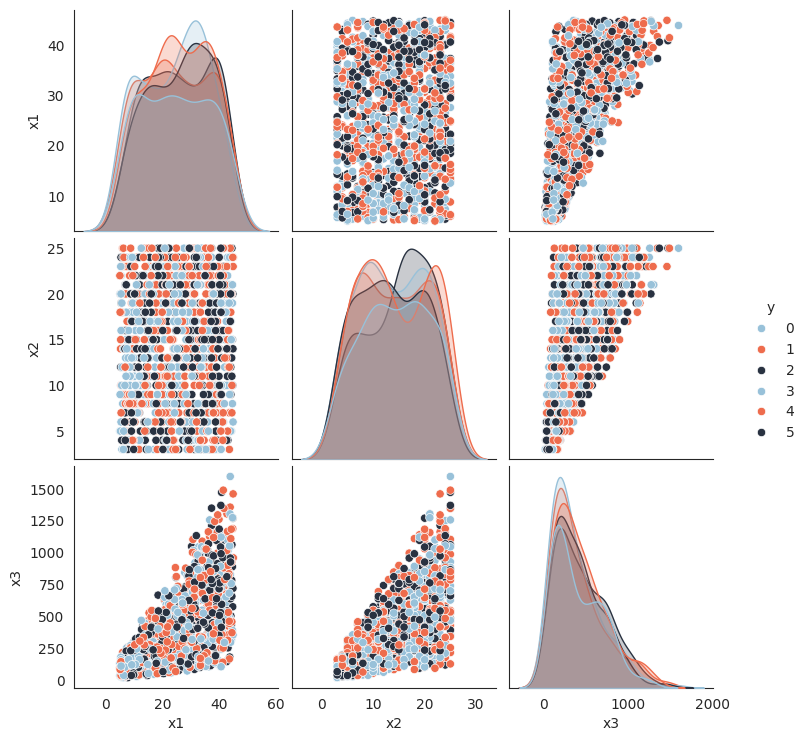

In [ ]:
sns.pairplot(tabla_zona, hue = 'y', vars = ['x1', 'x2', 'x3'], palette=svm_palette[1:] );

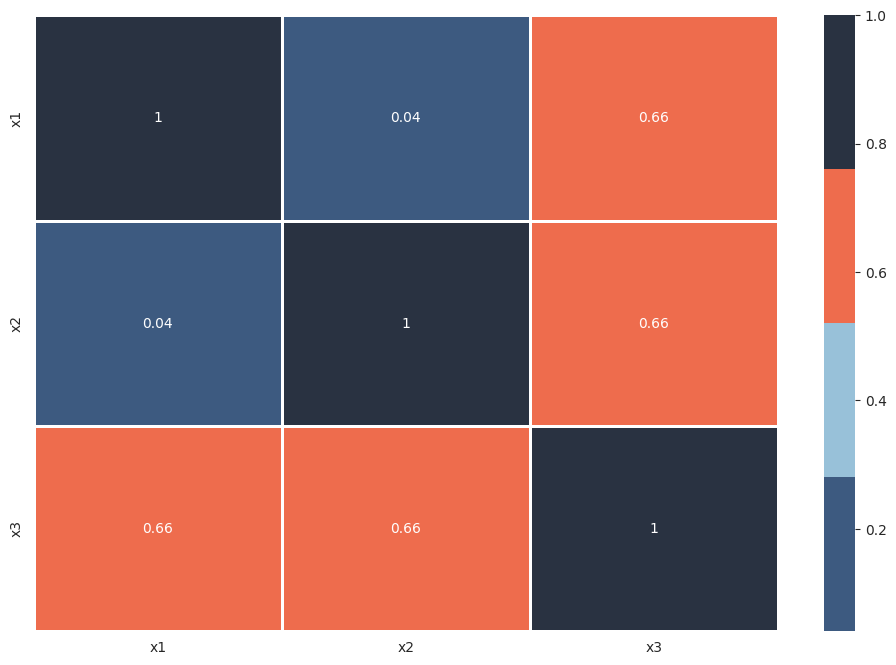

In [ ]:
# revisando la correlación entre las variables
zona_features = tabla_zona[['x1', 'x2', 'x3']] # selecting the feature columns
plt.figure(figsize=(12,8))
sns.heatmap(zona_features.corr(), annot=True, cmap=svm_palette, linewidths = 2) # calcular correlación y graficar como mapa de calor
plt.show()

# **Regresión logística**

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = X_renombrado
y = Y_renombrada

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (900, 3)
Shape of X_test: (300, 3)
Shape of y_train: (900,)
Shape of y_test: (300,)


In [ ]:
# preprocesando los datos para que tengan media cero y desviación de uno

# Import the necessary modules
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_train_scaled: (900, 3)
Shape of X_test_scaled: (300, 3)


In [ ]:
# Ajustando el modelo
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', multi_class="auto")
classifier.fit(X_train, y_train)

LogisticRegression(multi_class='auto')

In [ ]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Get the predicted probabilities for each class
probs_y = classifier.predict_proba(X_test)

# This part already formats the output in rows
res = "{:<10} | {:<10} | ".format("y_test", "y_pred")
# Dynamically add headers for probability columns based on the number of classes
for i in range(probs_y.shape[1]):
    res += "{:<13} | ".format(f"Prob_Class_{i}")
res += "\n"
res += "-"*(10 + 10 + probs_y.shape[1] * 15 + (probs_y.shape[1] -1) * 3 ) +"\n" # Adjusted line length

# Format and add the data rows
for x, y, probs in zip(y_test, y_pred, probs_y):
    res += "{:<10} | {:<10} | ".format(x, y)
    for prob in probs:
        res += "{:<13.4f} | ".format(prob) # Format probabilities to 4 decimal places
    res += "\n"

res += "-"*(10 + 10 + probs_y.shape[1] * 15 + (probs_y.shape[1] -1) * 3) +"\n" # Adjusted line length
print(res) # Add print to display the result

y_test     | y_pred     | Prob_Class_0  | Prob_Class_1  | Prob_Class_2  | Prob_Class_3  | Prob_Class_4  | Prob_Class_5  | 
-----------------------------------------------------------------------------------------------------------------------------
2          | 3          | 0.1471        | 0.1562        | 0.1847        | 0.1863        | 0.1805        | 0.1452        | 
1          | 4          | 0.1460        | 0.1770        | 0.1605        | 0.1665        | 0.1821        | 0.1678        | 
3          | 4          | 0.1441        | 0.1654        | 0.1705        | 0.1813        | 0.1856        | 0.1530        | 
0          | 2          | 0.1535        | 0.1453        | 0.2022        | 0.1900        | 0.1717        | 0.1373        | 
3          | 3          | 0.1595        | 0.1589        | 0.1708        | 0.1817        | 0.1754        | 0.1538        | 
1          | 2          | 0.1500        | 0.1397        | 0.2135        | 0.1951        | 0.1715        | 0.1302        | 
5          | 

In [ ]:
# Evaluando matriz de confusión
from sklearn.metrics import confusion_matrix # Import the confusion_matrix function
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 1  3 11 12 12  1]
 [ 2  2 23 26 15  2]
 [ 0  3 10 13 19  1]
 [ 3  4 12 14 16  1]
 [ 5  4 12  8  9  2]
 [ 1  8 15  8 20  2]]


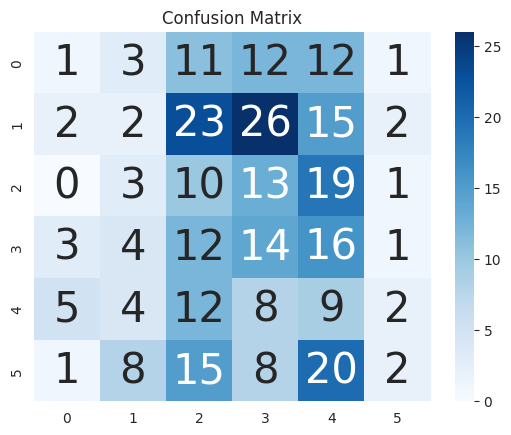

In [ ]:
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

Conclusión:
La tabla generada permite comparar los resultados reales con las predicciones que hizo el modelo de regresión logística para cada zona. Además, muestra con qué probabilidad el modelo eligió cada una de las zonas posibles. Aunque no siempre acierta, esta información nos ayuda a entender qué tan seguro estaba el modelo al tomar cada decisión y qué tan cerca estuvo de la zona correcta. Es una forma útil de evaluar su comportamiento en detalle.

# **3. Segmentación de los Datos**
Para esta etapa del análisis, se trabajará con la versión del archivo que no contiene la variable "zona". El objetivo es aplicar un modelo de regresión lineal múltiple con el fin de evaluar la capacidad predictiva del modelo utilizando únicamente las siguientes variables:
x1 = Duración promedio de los viajes (en minutos)
x2 = Cantidad de viajes
y = Ingresos diarios


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.decomposition import PCA
import umap

from sklearn.cluster import KMeans

import random

std_figure_size = (8,5)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

fixed_random_state = random.seed(42)

%config IPCompleter.use_jedi=False